How do we read in our film scripts dataset? How would we sort the values in the dataset? How could we remove all the null values from the dataset? How we group our data by year?

In [1]:
import pandas as pd

In [2]:
film_scripts = pd.read_csv('pudding_film_scripts.csv')

In [3]:
film_scripts[0:1] #indexing rows

,imdb_id,script_id,title,year,gross (inflation-adjusted),link
0,tt0019777,4031,The Cocoanuts,1929,NaN,http://www.pages.drexel.edu/~ina22/splaylib/Sc...


In [4]:
film_scripts.sort_values(by=['title'])

,imdb_id,script_id,title,year,gross (inflation-adjusted),link
1538,tt1022603,1534,(500) Days of Summer,2009,37.0,http://www.imsdb.com/Movie Scripts/500 Days of...
897,tt0147800,1512,10 Things I Hate About You,1999,65.0,http://www.imsdb.com/Movie Scripts/10 Things I...
1864,tt2024544,1517,12 Years a Slave,2013,60.0,http://www.imsdb.com/Movie Scripts/12 Years a ...
1282,tt0417385,1514,12 and Holding,2005,NaN,http://www.imsdb.com/Movie Scripts/12 and Hold...
1753,tt1542344,1520,127 Hours,2010,20.0,http://www.imsdb.com/Movie Scripts/127 Hours S...
...,...,...,...,...,...,...
831,tt0120906,8158,Zero Effect,1998,3.0,"Zero Effect (Jake Kasdan, 4.21.97).pdf"
1292,tt0421090,3768,Zerophilia,2005,NaN,http://www.imsdb.com/Movie Scripts/Zerophilia ...
1326,tt0443706,6491,Zodiac,2007,41.0,Zodiac (2007) (aka Chronicles) [Rev. 2006-7-5]...
832,tt0120907,6973,eXistenZ,1999,4.0,eXistenZ.pdf


In [5]:
film_scripts = film_scripts.rename(columns={'gross (inflation-adjusted)': 'gross_ia'})

In [6]:
# for index, row in film_scripts[0:10].iterrows():
#     print(row['gross_ia'])
#     if row['gross_ia'] >= 0:
#         print('is number')

In [7]:
len(film_scripts)

2000

In [8]:
subset_film_scripts = film_scripts[film_scripts.gross_ia.notna()]

In [9]:
films_year = subset_film_scripts.groupby('year')

In [10]:
films_year.get_group(1931)

,imdb_id,script_id,title,year,gross_ia,link
1,tt0021884,8521,Frankenstein,1931,298.0,Frankenstein (Florey & Fort) [1931-5-23] [Scan...


In [11]:
subset_film_scripts.nlargest(columns=['gross_ia'], n=5)

,imdb_id,script_id,title,year,gross_ia,link
163,tt0076759,1362,Star Wars: Episode IV - A New Hope,1977,1798.0,film_20100519/all_imsdb_05_19_10/Star-Wars-A-N...
777,tt0120338,5136,Titanic,1997,1249.0,http://www.dailyscript.com/scripts/Titanic.txt
137,tt0073195,2666,Jaws,1975,1103.0,http://www.dailyscript.com/scripts/Jaws.txt
81,tt0061852,5534,The Jungle Book,1967,1029.0,http://www.cubbi.org/disney/scripts/tjb.txt
195,tt0080684,3433,Star Wars: Episode V - The Empire Strikes Back,1980,937.0,http://www.scifiscripts.com/scripts/esb_final.txt


<AxesSubplot:>

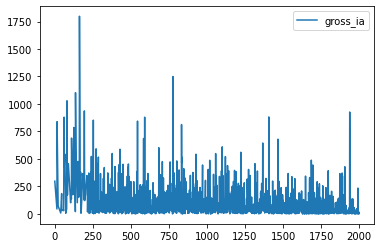

In [14]:
subset_film_scripts[['gross_ia']].plot()

In [16]:
film_scripts.fillna(0, inplace=True)

In [25]:
film_scripts.groupby('year').size()

year
1929     1
1931     2
1932     4
1933     3
1934     2
        ..
2011    84
2012    70
2013    72
2014    80
2015    62
Length: 81, dtype: int64

In [22]:
films_year = film_scripts.groupby('year').size().reset_index(name='counts')


In [32]:
films_year

,year,counts
0,1929,1
1,1931,2
2,1932,4
3,1933,3
4,1934,2
...,...,...
76,2011,84
77,2012,70
78,2013,72
79,2014,80


In [30]:
film_scripts_cleaned = film_scripts

In [39]:
film_scripts_cleaned.groupby('year')['gross_ia'].max().reset_index()


,year,gross_ia
0,1929,0.0
1,1931,298.0
2,1932,0.0
3,1933,0.0
4,1934,0.0
...,...,...
76,2011,209.0
77,2012,680.0
78,2013,429.0
79,2014,372.0


In [34]:
film_scripts[film_scripts.year == 2015]['gross_ia'].sum()

3508.0

In [41]:
film_scripts.duplicated().any()

False

In [42]:
film_scripts

,imdb_id,script_id,title,year,gross_ia,link
0,tt0019777,4031,The Cocoanuts,1929,0.0,http://www.pages.drexel.edu/~ina22/splaylib/Sc...
1,tt0021884,8521,Frankenstein,1931,298.0,Frankenstein (Florey & Fort) [1931-5-23] [Scan...
2,tt0022054,1086,The Last Flight,1931,0.0,"film_20100519/all_imsdb_05_19_10/Last-Flight,-..."
3,tt0022626,1631,American Madness,1932,0.0,http://www.imsdb.com/Movie Scripts/American Ma...
4,tt0022958,2438,Grand Hotel,1932,0.0,http://www.imsdb.com/Movie Scripts/Grand Hotel...
...,...,...,...,...,...,...
1995,tt3733778,8533,Pay the Ghost,2015,0.0,"Pay The Ghost (Dan Kay, 9-1-09).pdf"
1996,tt3808342,5499,Son of Saul,2015,0.0,http://gointothestory.blcklst.com/wp-content/u...
1997,tt3850214,8056,Dope,2015,18.0,Dope (2013.10.31) [Digital].pdf
1998,tt3859076,5507,Truth,2015,2.0,http://gointothestory.blcklst.com/wp-content/u...


In [46]:
test_df = pd.DataFrame({'gender': ['m','Male','fem.','FemalE','Femle']})

In [47]:
test_df

,gender
0,m
1,Male
2,fem.
3,FemalE
4,Femle


In [50]:
test_df['gender'].map({
    'm':'male', 'Male':'male', 'fem.':'female'
})

0      male
1      male
2    female
3       NaN
4       NaN
Name: gender, dtype: object

In [52]:
import re

In [58]:
test_df.gender[test_df['gender'].str.match(r"m", flags=re.IGNORECASE)] = 'male'
test_df.gender[test_df['gender'].str.match(r"f", flags=re.IGNORECASE)] = 'female'

In [59]:
test_df

,gender
0,male
1,male
2,female
3,female
4,female


In [60]:
film_scripts_cleaned

,imdb_id,script_id,title,year,gross_ia,link
0,tt0019777,4031,The Cocoanuts,1929,0.0,http://www.pages.drexel.edu/~ina22/splaylib/Sc...
1,tt0021884,8521,Frankenstein,1931,298.0,Frankenstein (Florey & Fort) [1931-5-23] [Scan...
2,tt0022054,1086,The Last Flight,1931,0.0,"film_20100519/all_imsdb_05_19_10/Last-Flight,-..."
3,tt0022626,1631,American Madness,1932,0.0,http://www.imsdb.com/Movie Scripts/American Ma...
4,tt0022958,2438,Grand Hotel,1932,0.0,http://www.imsdb.com/Movie Scripts/Grand Hotel...
...,...,...,...,...,...,...
1995,tt3733778,8533,Pay the Ghost,2015,0.0,"Pay The Ghost (Dan Kay, 9-1-09).pdf"
1996,tt3808342,5499,Son of Saul,2015,0.0,http://gointothestory.blcklst.com/wp-content/u...
1997,tt3850214,8056,Dope,2015,18.0,Dope (2013.10.31) [Digital].pdf
1998,tt3859076,5507,Truth,2015,2.0,http://gointothestory.blcklst.com/wp-content/u...


In [62]:
films_gross_sum = film_scripts_cleaned.groupby('year')['gross_ia'].sum().reset_index()

In [75]:
films_gross_sum

,year,gross_ia
0,1929,0.0
1,1931,298.0
2,1932,0.0
3,1933,0.0
4,1934,0.0
...,...,...
76,2011,4282.0
77,2012,5288.0
78,2013,4839.0
79,2014,4159.0


In [72]:
films_gross_sum.shape, film_scripts_cleaned.shape

((81, 2), (2000, 6))

In [76]:
films_gross_sum = films_gross_sum.rename(columns={'gross_ia': 'gross_sum'})

In [77]:
films_gross_sum.columns, film_scripts_cleaned.columns

(Index(['year', 'gross_sum'], dtype='object'),
 Index(['imdb_id', 'script_id', 'title', 'year', 'gross_ia', 'link'], dtype='object'))

In [89]:
merged_films = subset_film_scripts.merge(films_gross_sum, how='outer', on=['year'])

In [90]:
merged_films

,imdb_id,script_id,title,year,gross_ia,link,gross_sum
0,tt0021884,8521.0,Frankenstein,1931,298.0,Frankenstein (Florey & Fort) [1931-5-23] [Scan...,298.0
1,tt0031725,3016.0,Ninotchka,1939,45.0,http://www.dailyscript.com/scripts/Ninotchka.txt,884.0
2,tt0032138,1483.0,The Wizard of Oz,1939,839.0,"film_20100519/all_imsdb_05_19_10/Wizard-of-Oz,...",884.0
3,tt0035423,1213.0,Kate & Leopold,2001,72.0,film_20100519/all_imsdb_05_19_10/Kate-&-Leopol...,6293.0
4,tt0120737,1115.0,The Lord of the Rings: The Fellowship of the Ring,2001,482.0,film_20100519/all_imsdb_05_19_10/Lord-of-the-R...,6293.0
...,...,...,...,...,...,...,...
1682,NaN,NaN,NaN,1961,NaN,NaN,0.0
1683,NaN,NaN,NaN,1963,NaN,NaN,0.0
1684,NaN,NaN,NaN,1964,NaN,NaN,0.0
1685,NaN,NaN,NaN,1965,NaN,NaN,0.0


<AxesSubplot:xlabel='gross_ia', ylabel='gross_sum'>

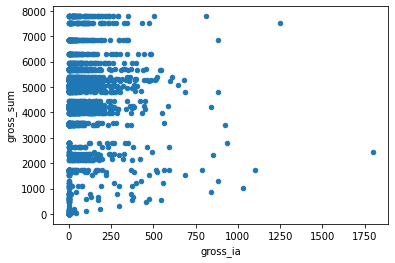

In [81]:
merged_films.plot.scatter(x='gross_ia', y='gross_sum')